Create a model with piecewise warps, and use the ground truth model to synthesize data. 

Status:
- Mostly works but a few trials misaligned
- Need to check optimization code:
- Fix template, fit warps
- Fix warps, fit template
- Check alternating optimization

Other ideas if warp fitting is a problem:
- Alternative parameterization
- Different temperature decay schedules
- Ensembling

In [50]:
%pylab inline
from affinewarp import PiecewiseWarping

Populating the interactive namespace from numpy and matplotlib


In [57]:
n_knots = 1
model = PiecewiseWarping(n_knots=n_knots)

In [58]:
n_trials = 30
n_time = 100
n_neuron = 10
model.initialize_warps(n_trials)
model.x_knots, model.y_knots = model._mutate_knots(0.1);
#model.y_knots[:, 0] = 0.
#model.y_knots[:, -1] = 1.

(0, 1)

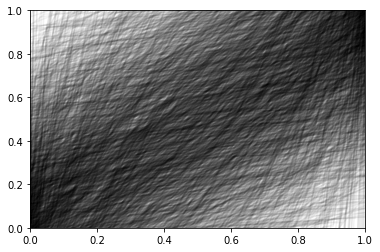

In [53]:
for _ in range(100):
    x, y = model._mutate_knots(0.5);
    plot(x.T, y.T, c='k', alpha=0.05);
ylim(0, 1)
xlim(0, 1)

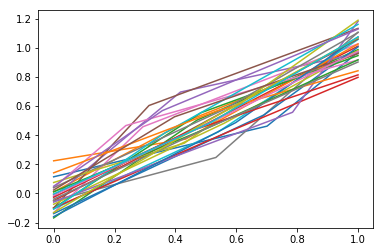

In [59]:
plot(model.x_knots.T, model.y_knots.T);

In [60]:
template = np.random.rand(n_time, n_neuron)
from scipy.ndimage import gaussian_filter1d
template_sigma = n_time / 50.
template = gaussian_filter1d(template, template_sigma, axis=0)
template[:n_time//4] = 0 # zero-pad boundaries
template[3*n_time//4:] = 0
aligned_data = np.tile(template[None, ...], (n_trials, 1, 1))
data = model.transform(aligned_data)

In [61]:
model.template = template
data = model.predict()

In [62]:
from affinewarp.visualization import binned_heatmap

In [63]:
model_fit.template.min()

0.0

In [77]:
model_fit = PiecewiseWarping(n_knots=n_knots,l2_reg_scale=0.0,max_temp=-1., smoothness_reg_scale=0.0)
model_fit.copy_fit(model)
#model_fit.template = None
#model_fit.template = np.random.rand(*model_fit.template.shape)
#model_fit.x_knots, model_fit.y_knots = model_fit._mutate_knots(1.0)
model_fit.fit(data, iterations=1000, warp_iterations=0)


100%|██████████| 1000/1000 [00:01<00:00, 635.96it/s]

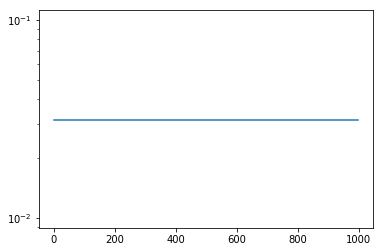

In [78]:
semilogy(model_fit.loss_hist)

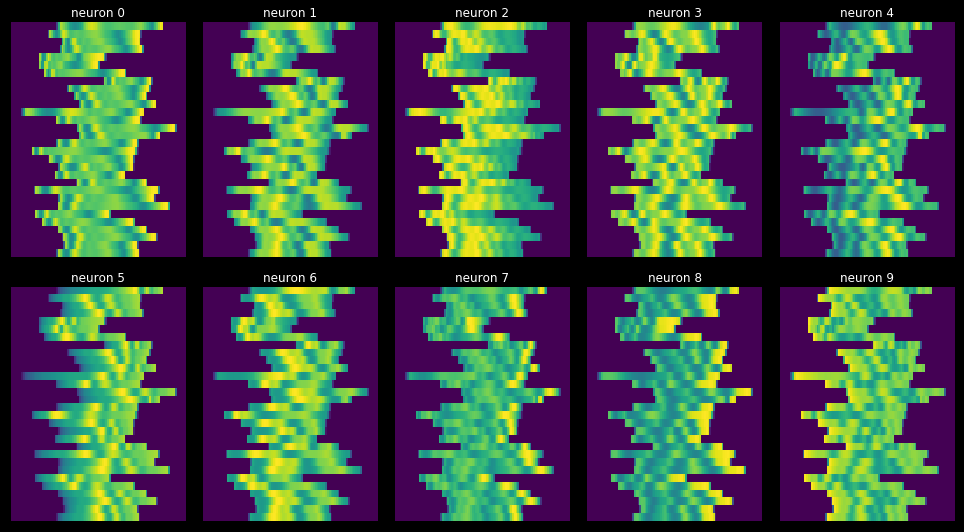

In [86]:
binned_heatmap((data), subplots=(2,5));

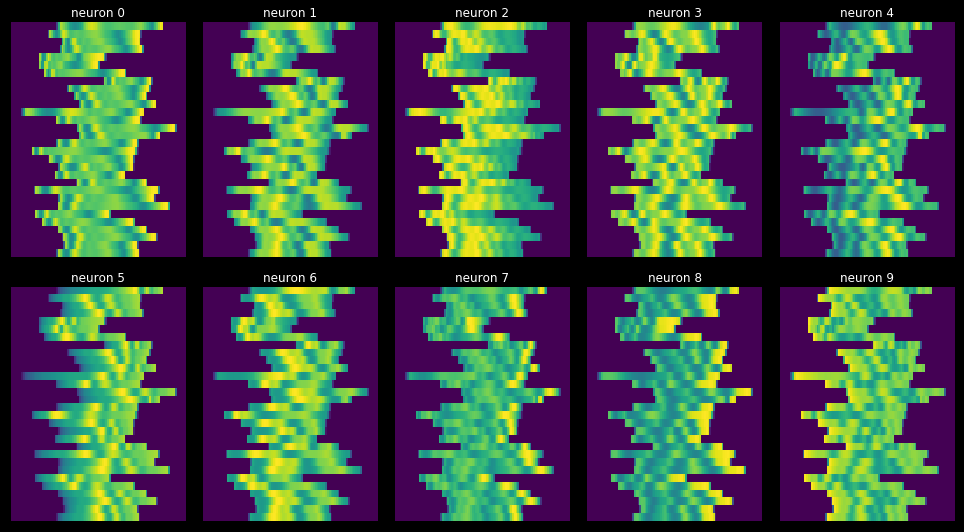

In [87]:
binned_heatmap(model_fit.transform(data), subplots=(2,5));

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

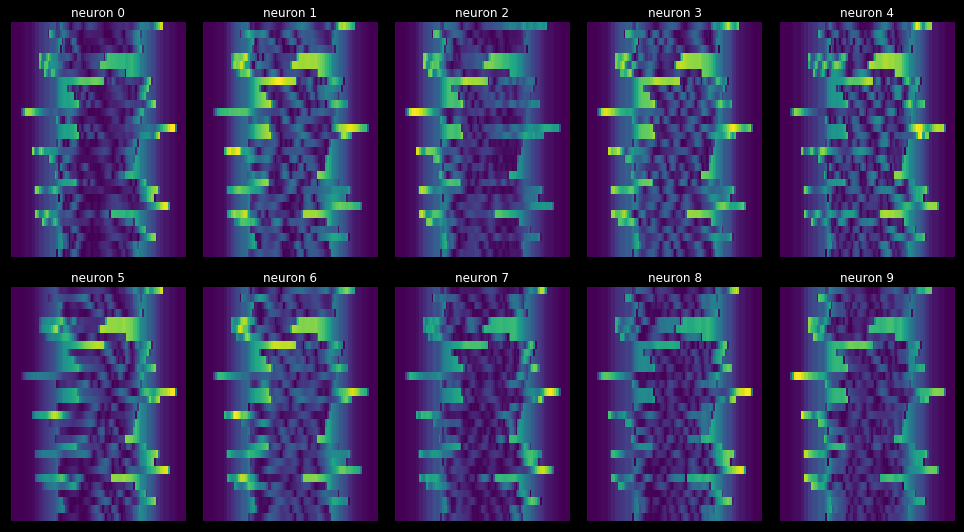

In [88]:
binned_heatmap(np.abs(model_fit.predict()-data), subplots=(2,5));colorbar()

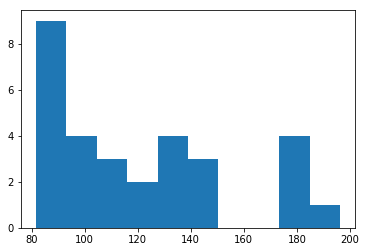

In [90]:
res = hist(np.abs(model_fit.predict()-data).sum((1,2)))

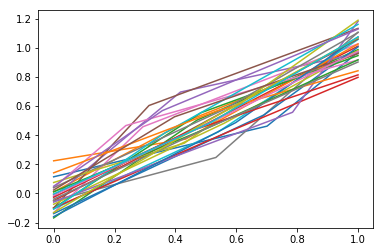

In [93]:
plot(model.x_knots.T, model.y_knots.T);

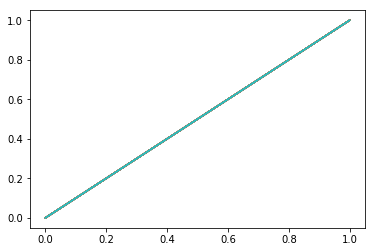

In [94]:
plot(model_fit.x_knots.T, model_fit.y_knots.T);

In [18]:
plot(model.x_knots.T - model.x, model.y_knots.T);

AttributeError: 'PiecewiseWarping' object has no attribute 'x'

In [ ]:
imshow(model_fit.template, aspect='auto')

In [ ]:
imshow(model.template, aspect='auto')